## Comparison Between The Analytical Solution, Finite Difference, and Finite Element Method for The 2-D Heat Diffusion Equation  

$ \textbf{By Craig Offutt} $

In [22]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from IPython.display import Image

### Establishing The Problem 

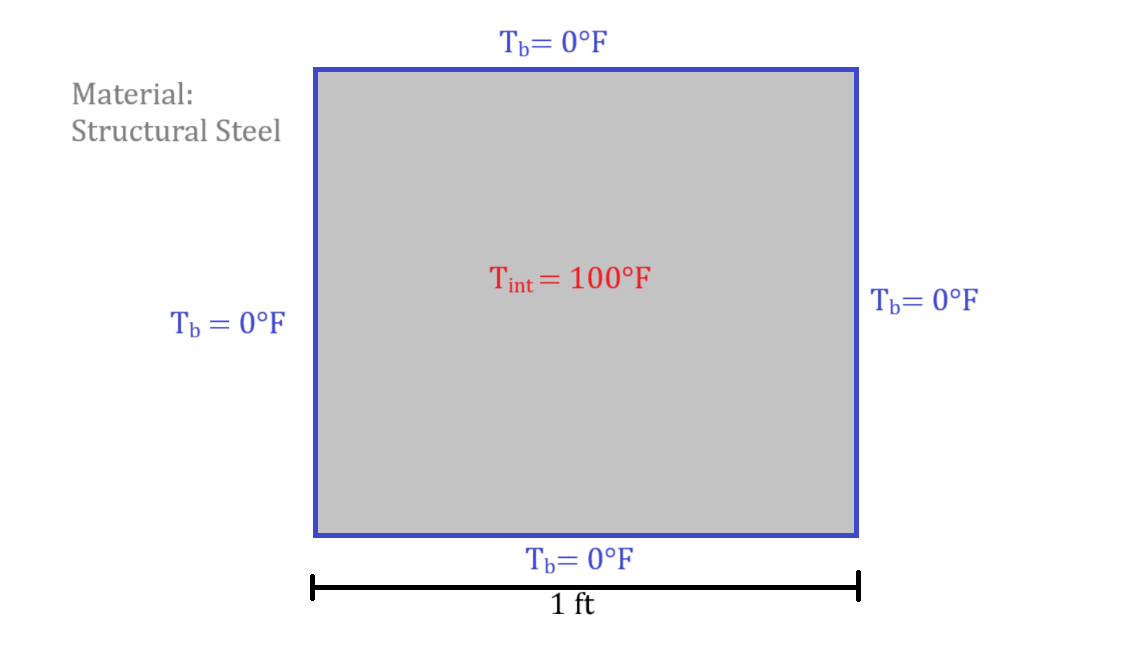

In [23]:
Image(filename='HeatTransferProjectModel.png')

In this analysis, we will examine a slender square steel plate measuring 1 foot in side length. The plate initially possesses a temperature of 100 °F, and each edge of the plate is kept at 0°F, which constitutes an essential boundary condition. Importantly, no internal heat generation occurs within the plate.

Due to the thin nature of the plate, we can simplify the problem by considering it in a two-dimensional context. Given these specifics, we will employ the two-dimensional Heat Equation with the absence of heat generation, and we will apply Dirichlet Conditions to account for the boundary conditions.

#### Governing Equation

$$ \frac{\delta T}{\delta t} = \alpha \left(\frac{\delta^2 T}{\delta x^2} + \frac{\delta^2 T}{\delta y^2}\right)$$

Define Domain:

$$0 \leq t \leq t_f$$

$$0 \leq x \leq a$$

$$0 \leq y \leq b$$

In [24]:
#Width [ft]
a=1
#Length [ft]
b=1 
#Time of simulation [s]
t_f = 60

Boundary Conditions: 

$$ T(t,0,y) = T(t,a,y) = T_{b}, \quad 0 \leq x \leq a, \quad t \geq 0$$
$$ T(t,x,0) = T(t,x,b) = T_{b}, \quad 0 \leq y \leq b, \quad t \geq 0$$
$$ T_{b} = 0 $$

In [25]:
# Enter T_b [°F]
T_b = 0 

Intial Conditions:

$$ T(0,x,y) = f(x,y)$$
$$ f(x,y) = T_{int} = 100 $$


In [26]:
#Define intial Condition [°F]
T_int = 100

Define Material ($\alpha$):

In [27]:
#Thermal Diffusivity [ft^2 /s]
alpha = 0.00019114636619800996 #Structural Steel

### Analytical Solution

The process of obtaining this solution relies on a variety of mathematical methods, encompassing techniques such as the separation of variables and the principle of superposition. Implementing these strategies entails the solution of 3 ordinary differential equations that conform to the prescribed boundary condition. The overarching solution to this equation is expressed in the form of a Fourier Series. Finally, it is imperative to meet the initial condition as well. Presented below is the solution to our governing equation.

$$
T(t, x, y)=\sum_{m=1}^{\infty} \sum_{n=1}^{\infty} A_{m n} \sin \left(\mu_m x\right) \sin \left(\nu_n y\right) e^{-\lambda_{m n}^2 t},
$$
where $$\mu_m=\frac{m \pi}{a}, \nu_n=\frac{n \pi}{b}, \lambda_{m n}= \pi \sqrt{\alpha \left(\frac{m^2}{a^2}+ \frac{n^2}{b^2} \right)}$$, and
$$
A_{m n}=\frac{4}{a b} \int_0^a \int_0^b f(x, y) \sin \left(\mu_m x\right) \sin \left(\nu_n y\right) d y d x .
$$

#### Solving for $A_{mn}$

$$A_{m n}=\frac{4}{a b} \int_0^a \int_0^b f(x, y) \sin \left(\mu_m x\right) \sin \left(\nu_n y\right) d y d x 
$$

$$ \implies A_{m n}=  \frac{4}{1(1)}\int_0^{1} \int_0^{1} 100 \sin \left(\frac{m \pi}{1} x\right) \sin \left(\frac{n \pi}{1}y \right) d y d x 
$$

$$ \implies A_{m n}= 400 \int_0^{1} \sin \left(m \pi x\right) dx \int_0^{1}\sin \left(n \pi y \right) d y  
$$

$$ \implies A_{m n}= 
\frac{400\left(-(-1)^m+1\right)\left(-(-1)^n+1\right)}{\pi^2 m n}
$$ 

Reference: http://ramanujan.math.trinity.edu/rdaileda/teach/s12/m3357/lectures/lecture_3_6_short.pdf

In [28]:
def A(m,n):
    return (400 * (-(-1) ** m + 1) * (-(-1) ** n + 1)) / (np.pi ** 2 * m * n)

#### Define $\mu_m$,$\nu_n$, and $\lambda_{mn}$:

In [29]:
def mu(m,a):
    return np.pi*m/a

In [30]:
def nu(n,b):
    return np.pi*n/b

In [31]:
def Lambda(alpha,m,a,n,b):
    return np.pi * np.sqrt(alpha*(m**2/a**2 +n**2/b**2))

#### Simulation

Given the finite precision of computer systems, it remains essential to discretize the system. This entails discretizing both the spatial coordinates (x and y) and the time coordinate (t). Additionally, it's worth mentioning that our Fourier Series comprises two infinite sums. To accommodate the finite capabilities of computers, we must establish finite limits for these summations. While this adjustment may introduce some level of error, it's crucial to recognize that computers typically maintain accuracy up to 16 decimal places with 64-bit double precision. Setting the summation limit to 100 should still yield a highly accurate result, potentially within the computer's precision limits. Mathematically, we express this as follows:

$$
T(t, x, y)=\sum_{m=1}^{\infty} \sum_{n=1}^{\infty} A_{m n} \sin \left(\mu_m x\right) \sin \left(\nu_n y\right) e^{-\lambda_{m n}^2 t}
$$

$$ \implies T(t,x,y)   \approx \sum_{m=1}^{100} \sum_{n=1}^{100} A_{m n} \sin \left(\mu_m x\right) \sin \left(\nu_n y\right) e^{-\lambda_{m n}^2 t}$$ . 

##### Set-up

Discretization:

In [32]:
x = np.linspace(0,a,11)
y = np.linspace(0,b,11)
t = np.array([1,10,60]) #This will be the only times used in the results section

In [33]:
#Summation Limit
m_end=100
n_end=m_end

In [34]:
#Creating Temperature Matrix
T_analytic= np.zeros((len(t),len(x),len(y)))

##### Solving 

This may take up to 30 seconds to solve due to the computational complexity

In [35]:
for i in range(0,len(t)): #values of t
    for j in range(0,len(x)): #all x values
        for l in range(0,len(y)): #all y values
            for m in range(1,m_end+1): #Summation 1
                for n in range(1,n_end+1): #Summation 2
                    T_analytic[i,j,l] += A(m,n) *np.sin(mu(m,a)*x[j])*np.sin(nu(n,b)*y[l])*np.exp(-Lambda(alpha,m,a,n,b)**2*t[i])

### Finite Difference Method

#### FTCS Scheme (Forward Time, Centered Space)

##### Forward Time

By definition of a derivative,

$$\frac{\delta T}{\delta t} = \lim_{{\Delta t \to 0}} \frac{{T(t + \Delta t,x,y) - T(t,x,y)}}{{\Delta t}} $$.

By applying a finite  difference ($\Delta t > 0$), we have that,

$$\frac{\delta T}{\delta t} =  \frac{{T(t + \Delta t,x,y) - T(t,x,y)}}{{\Delta t}} + O(\Delta t)$$.

##### Centered Space

By defition of derivative using central difference forumla,  [include more detail]

$$\frac{\delta^2 T}{\delta x^2} = \lim_{{\Delta x \to 0}} \frac{{T(t,x - \Delta x,y) - 2T(t,x,y) + T(t,x + \Delta x,y)}}{{\Delta x^2}} $$.

By applying a finite  difference ($\Delta x > 0$), we have that,

$$\frac{\delta^2 T}{\delta x^2} = \frac{{T(t,x - \Delta x,y) - 2T(t,x,y) + T(t,x + \Delta x,y)}}{{\Delta x^2}} + O(\Delta x^2)$$.

Therefore, 

$$\frac{\delta^2 T}{\delta x^2} \approx  \frac{{T(t,x - \Delta x,y) - 2T(t,x,y) + T(t,x + \Delta x,y)}}{{\Delta x^2}} $$.

Without loss of generality, the same concept can be applied to other spatial coordinate, y.

##### Governing Forumla

$$ \frac{{T(t + \Delta t,x,y) - T(t,x,y)}}{{\Delta t}} = \alpha \left( \frac{{T(t,x - \Delta x,y) - 2T(t,x,y) + T(t,x + \Delta x,y)}}{{\Delta x^2}} + \frac{{T(t,x ,y- \Delta y) - 2T(t,x,y) + T(t,x ,y+ \Delta y)}}{{\Delta y^2}} \right) $$

$$ \implies T(t + \Delta t,x,y) - T(t,x,y) = \frac{\alpha}{\Delta t} \left( \frac{{T(t,x - \Delta x,y) - 2T(t,x,y) + T(t,x + \Delta x,y)}}{{\Delta x^2}} + \frac{{T(t,x ,y- \Delta y) - 2T(t,x,y) + T(t,x ,y+ \Delta y)}}{{\Delta y^2}} \right) $$

$$ \implies  T(t + \Delta t,x,y)= T(t,x,y) + \frac{\alpha}{\Delta t} \left( \frac{{T(t,x - \Delta x,y) - 2T(t,x,y) + T(t,x + \Delta x,y)}}{{\Delta x^2}} + \frac{{T(t,x ,y- \Delta y) - 2T(t,x,y) + T(t,x ,y+ \Delta y)}}{{\Delta y^2}} \right) $$.

Note, since $\Delta x = \Delta y$ we have,

$$ \implies  T(t + \Delta t,x,y)= T(t,x,y) + \frac{\alpha}{\Delta t} \left( \frac{{T(t,x - \Delta x,y) - 2T(t,x,y) + T(t,x + \Delta x,y)}}{{\Delta x^2}} + \frac{{T(t,x ,y- \Delta y) - 2T(t,x,y) + T(t,x ,y+ \Delta y)}}{{\Delta x^2}} \right) $$.

$$ \implies  T(t + \Delta t,x,y)= T(t,x,y) + \frac{\alpha}{\Delta x^2\Delta t} \left( T(t,x - \Delta x,y) + T(t,x + \Delta x,y) - 4T(t,x,y) + T(t,x ,y- \Delta y)  + T(t,x ,y+ \Delta y) \right) $$.

#### Simulation 

##### Set-up 

Discretization:

In [36]:
x = np.linspace(0,a,11)
y = np.linspace(0,b,11)
t = np.linspace(0,t_f,61)

dx = x[1] - x[0]
dy = y[1] - y[0]
dt= t[1] - t[0]

In [37]:
#Creating Temperature Matrix
T= np.zeros((len(t),len(x),len(y)))

Stablity Condition: 

$$
\Delta t \leq \frac{1}{4 \alpha\left(\frac{1}{\Delta x^2}+\frac{1}{\Delta y^2}\right)}
$$

Since $ \Delta x = \Delta y $ this implies,

$$
\Delta t \leq \frac{1}{4 \alpha\left(\frac{2}{\Delta x^2}\right)}
$$

$$ \implies 
\Delta t \leq \frac{\Delta x^2}{2 \alpha} $$

In [38]:
Stablity_Cond = dx**2 / (2*alpha)
if dt < Stablity_Cond:
    print('Stablity Condition is meet')

Stablity Condition is meet


In [39]:
#Creating Temperature Matrix
T= np.zeros((len(t),len(x),len(y)))

Applying Boundary Conditions and Inital Conditions:

In [40]:
#Apply Inital Conditions
T[0,:,:]= T_int

In [41]:
#Apply Boundary Conditions
T[:,0,:] = T_b
T[:,-1,:] = T_b
T[:,:,0] = T_b
T[:,:,-1] = T_b

##### Solving

In [42]:
d = alpha*dt/(dx**2)

for i in range(0,len(t)-1):
    for j in range(1,len(x)-1):
        for l in range(1,len(y)-1):
            T[i+1,j,l] = T[i,j,l] + d*(T[i,j-1,l] + T[i,j+1,l] - 4*T[i,j,l] + T[i,j,l-1] + T[i,j,l+1])
    

### Finite Element Method (Using Ansys)

Ansys (Mechanical) is widely used and is an industry standard. For this project, Ansys Student 2023 R2 was used. I will briefly go over the steps that I used in Ansys to obtain the results. 

#### Model: 

The geometry used was developed in Discovery CAD through Ansys Software. Within workbench, the analysis was set to 2D to allow the system to know which set of equations to use. 

As stated earlier, this simulation used structural steel as the designated material. Mathematically, this will only affect the thermal diffusity ($\alpha$). As such, it was important to ensure the same value was used from the FDM/Analytical Solution. 

#### Meshing: 

The meshing used a face sizing tool where each element size would be .1 ft x .1 ft. This would compliment the Finite Difference Method and Analytical Solution whose system were both discretized into in the x and y direction of .1 ft.

Below is a picture of the mesh generated by Ansys.

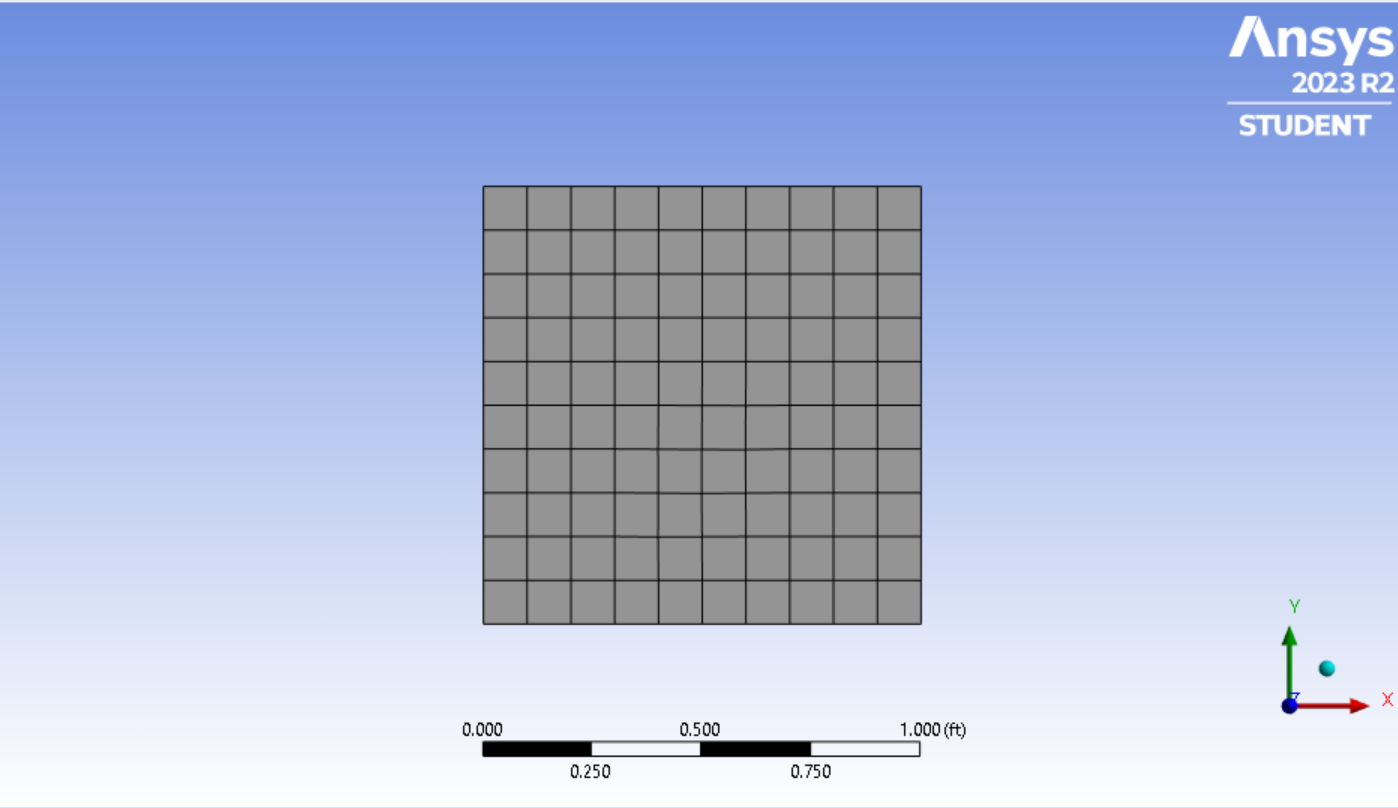

In [43]:
Image(filename='HeatTransferProjectAnsysModel.png')

Note, the element order for the system was set to linear. 

#### Analysis

The analysis type was set to transient thermal with a uniform inital temperature of 100°F. 

The simulation was set to run for 60 seconds with a 60 discrete time steps 
- $\textbf{e.g:}$ Step 1 is t=1, Step 2 is t=2, etc

Boundary conditions were established by setting each edge of the 1'x 1' square to 0°F

#### Data

In [44]:
D = np.array([0,0,0,0,0,0,0,0,0,0,0,0,96.946,98.14,98.158,98.158,98.158,98.158,98.158,98.14,96.946,0,0,98.14,99.936,99.966,99.966,99.966,99.966,99.966,99.936,98.14,0,0,98.158,99.966,99.999,99.999,99.999,99.999,99.999,99.966,98.158,0,0,98.158,99.966,99.999,100,100,100,99.999,99.966,98.158,0,0,98.158,99.966,99.999,100,100,100,99.999,99.966,98.158,0,0,98.158,99.966,99.999,100,100,100,99.999,99.966,98.158,0,0,98.158,99.966,99.999,99.999,99.999,99.999,99.999,99.966,98.158,0,0,98.14,99.936,99.966,99.966,99.966,99.966,99.966,99.936,98.14,0,0,96.946,98.14,98.158,98.158,98.158,98.158,98.158,98.14,96.946,0,0,0,0,0,0,0,0,0,0,0,0])
D_10s = np.array([0,0,0,0,0,0,0,0,0,0,0,0,74.46,83.455,84.201,84.249,84.251,84.249,84.201,83.455,74.46,0,0,83.455,97.195,98.407,98.488,98.492,98.488,98.407,97.195,83.455,0,0,84.201,98.407,99.79,99.886,99.892,99.886,99.79,98.407,84.201,0,0,84.249,98.488,99.886,99.987,99.993,99.987,99.886,98.488,84.249,0,0,84.251,98.492,99.892,99.993,99.999,99.993,99.892,98.492,84.251,0,0,84.249,98.488,99.886,99.987,99.993,99.987,99.886,98.488,84.249,0,0,84.201,98.407,99.79,99.886,99.892,99.886,99.79,98.407,84.201,0,0,83.455,97.195,98.407,98.488,98.492,98.488,98.407,97.195,83.455,0,0,74.46,83.455,84.201,84.249,84.251,84.249,84.201,83.455,74.46,0,0,0,0,0,0,0,0,0,0,0,0])
D_60s = np.array([0,0,0,0,0,0,0,0,0,0,0,0,26.479,41.42,47.332,49.102,49.449,49.102,47.332,41.42,26.479,0,0,41.42,66.338,76.508,79.629,80.25,79.629,76.508,66.338,41.42,0,0,47.332,76.508,88.877,92.776,93.566,92.776,88.877,76.508,47.332,0,0,49.102,79.629,92.776,97.004,97.873,97.004,92.776,79.629,49.102,0,0,49.449,80.25,93.566,97.873,98.763,97.873,93.566,80.25,49.449,0,0,49.102,79.629,92.776,97.004,97.873,97.004,92.776,79.629,49.102,0,0,47.332,76.508,88.877,92.776,93.566,92.776,88.877,76.508,47.332,0,0,41.42,66.338,76.508,79.629,80.25,79.629,76.508,66.338,41.42,0,0,26.479,41.42,47.332,49.102,49.449,49.102,47.332,41.42,26.479,0,0,0,0,0,0,0,0,0,0,0,0])

### Results

To analyze the results we will compare consider all three types of methods used to solve (Analytical, FDM, FEA). The results will consist of the following:

1. Comparing Temperatures at t=1s
    - Contour Plots
    - Temperatures (Max and Average) 
    - Errors (Max and Average)
2. Comparing Temperatures at t=10s
    - Contour Plots
    - Temperatures (Max and Average) 
    - Errors (Max and Average)
3. Comparing Temperatures at t=60s
    - Contour Plots
    - Temperatures (Max and Average) 
    - Errors (Max and Average)

#### Comparing Temperatures at t=1s

In [45]:
T_A  = T_analytic[0,:,:] 
T_FDM  = T[1,:,:]
T_FEA = D.reshape(11,11)

In [46]:
X , Y = np.meshgrid(x, y) #Establishes a Mesh Grid in order to plot contours 

##### Contour Plots:

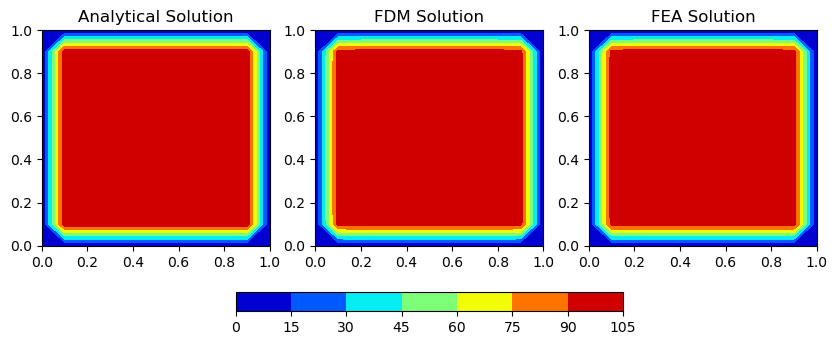

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10, 4))

# Analytical Solution
ax0 = axes[0].contourf(X, Y, T_A ,cmap='jet')
axes[0].set_title("Analytical Solution")

#FDM Solution
axes[1].contourf(X, Y, T_FDM,cmap='jet')
axes[1].set_title("FDM Solution")

#FEA Solution
axes[2].contourf(X, Y, T_FEA,cmap='jet')
axes[2].set_title("FEA Solution")

#Colorbar
cmap = fig.colorbar(ax0,ax=axes,location='bottom',shrink=.5)

In [48]:
#Displays the amount of precision for data frame
pd.set_option("display.precision", 5)

##### Temperatures Calculations

Max Temperatures:

In [49]:
Max_Temp_A  = np.max(T_A )
Max_Temp_FDM = np.max(T_FDM)
Max_Temp_FEA = np.max(T_FEA)

Average Temperatures:

In [50]:
Avg_Temp_A = np.mean(T_A)
Avg_Temp_FDM = np.mean(T_FDM)
Avg_Temp_FEA = np.mean(T_FEA)

##### Temperatures Data

In [51]:
df_Temps = pd.DataFrame({
  'Temperature': ['Max','Average'],
  'Analytical': [Max_Temp_A,Avg_Temp_A],
  'FDM': [Max_Temp_FDM,Avg_Temp_FDM],
  'FEA': [Max_Temp_FEA,Avg_Temp_FEA]
})

df_Temps

,Temperature,Analytical,FDM,FEA
0,Max,100.00000,100.00000,100.00000
1,Average,66.94214,66.37345,66.40588


##### Error Calculations

In [52]:
# Error between Analytical and FDM 
Error_FDM = abs(T_A - T_FDM)

# Error between Analytical and FEA
Error_FEA = abs(T_A - T_FEA)

Max Error:

In [53]:
MaxError_FDM = np.max(Error_FDM)
MaxError_FEA = np.max(Error_FEA)

In [54]:
#Location in which the maxximum error occurs
Loc_FDM = np.where(Error_FDM == np.max(MaxError_FDM))

Loc_FEA = np.where(Error_FEA == np.max(MaxError_FEA))

Loc_FDM, Loc_FEA 

((array([1, 9], dtype=int64), array([9, 9], dtype=int64)),
 (array([1, 9], dtype=int64), array([9, 9], dtype=int64)))

In [55]:
#Max error occurs at x=.9, y=.9 FDM 

Percent_MaxError_FDM =(MaxError_FDM) / T_analytic[0,9,9] *100

#Max error occurs at x=.9, y=.9 FDM 

Percent_MaxError_FEA = (MaxError_FEA) / T_analytic[0,9,9] *100

Average Error:

In [56]:
AvgError_FDM = np.mean(Error_FDM)
AvgError_FEA = np.mean(Error_FEA)

##### Error Data:

In [57]:
df_Error_Temps = pd.DataFrame({
  'Error Type' : ['Max Absolute','Max Relative[%]','Average'],
  'Analytical': [0,0,0], #No error between analytical and itself
  'FDM': [MaxError_FDM,Percent_MaxError_FDM, AvgError_FDM],
  'FEA': [MaxError_FEA,Percent_MaxError_FEA,AvgError_FEA]
})

df_Error_Temps

,Error Type,Analytical,FDM,FEA
0,Max Absolute,0,3.82286,3.05394
1,Max Relative[%],0,3.82287,3.05394
2,Average,0,0.56869,0.53626


#### Comparing Temperatures at t=10s

In [58]:
T_A  = T_analytic[1,:,:] 
T_FDM  = T[10,:,:]
T_FEA = D_10s.reshape(11,11)

In [59]:
X , Y = np.meshgrid(x, y) #Establishes a Mesh Grid in order to plot contours 

##### Contour Plots:

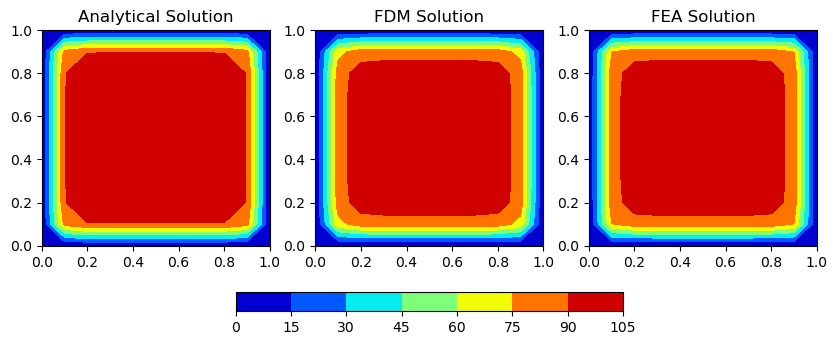

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10, 4))

# Analytical Solution
ax0 = axes[0].contourf(X, Y, T_A ,cmap='jet')
axes[0].set_title("Analytical Solution")

#FDM Solution
axes[1].contourf(X, Y, T_FDM,cmap='jet')
axes[1].set_title("FDM Solution")

#FEA Solution
axes[2].contourf(X, Y, T_FEA,cmap='jet')
axes[2].set_title("FEA Solution")

#Colorbar
cmap = fig.colorbar(ax0,ax=axes,location='bottom',shrink=.5)

In [61]:
#Displays the amount of precision for data frame
pd.set_option("display.precision", 5)

##### Temperatures Calculations

Max Temperatures:

In [62]:
Max_Temp_A  = np.max(T_A )
Max_Temp_FDM = np.max(T_FDM)
Max_Temp_FEA = np.max(T_FEA)

Average Temperatures:

In [63]:
Avg_Temp_A = np.mean(T_A)
Avg_Temp_FDM = np.mean(T_FDM)
Avg_Temp_FEA = np.mean(T_FEA)

##### Temperatures Data

In [64]:
df_Temps = pd.DataFrame({
  'Temperature': ['Max','Average'],
  'Analytical': [Max_Temp_A,Avg_Temp_A],
  'FDM': [Max_Temp_FDM,Avg_Temp_FDM],
  'FEA': [Max_Temp_FEA,Avg_Temp_FEA]
})

df_Temps

,Temperature,Analytical,FDM,FEA
0,Max,100.00000,99.99978,99.9990
1,Average,63.79585,61.79231,62.0308


##### Error Calculations

In [65]:
# Error between Analytical and FDM 
Error_FDM = abs(T_A - T_FDM)

# Error between Analytical and FEA
Error_FEA = abs(T_A - T_FEA)

Max Error:

In [66]:
MaxError_FDM = np.max(Error_FDM)
MaxError_FEA = np.max(Error_FEA)

In [67]:
#Location in which the maxximum error occurs
Loc_FDM = np.where(Error_FDM == np.max(MaxError_FDM))

Loc_FEA = np.where(Error_FEA == np.max(MaxError_FEA))

Loc_FDM, Loc_FEA 

((array([9], dtype=int64), array([9], dtype=int64)),
 (array([1, 8, 9], dtype=int64), array([8, 9, 8], dtype=int64)))

In [68]:
#Max error occurs at x=.9, y=.9 FDM 

Percent_MaxError_FDM =(MaxError_FDM) / T_analytic[1,9,9] *100

#Max error occurs at x=.1, y=.8 FEA

Percent_MaxError_FEA = (MaxError_FEA) / T_analytic[1,1,8] *100

Average Error:

In [69]:
AvgError_FDM = np.mean(Error_FDM)
AvgError_FEA = np.mean(Error_FEA)

##### Error Data:

In [70]:
df_Error_Temps = pd.DataFrame({
  'Error Type' : ['Max Absolute','Max Relative[%]','Average'],
  'Analytical': [0,0,0], #No error between analytical and itself
  'FDM': [MaxError_FDM,Percent_MaxError_FDM, AvgError_FDM],
  'FEA': [MaxError_FEA,Percent_MaxError_FEA,AvgError_FEA]
})

df_Error_Temps

,Error Type,Analytical,FDM,FEA
0,Max Absolute,0,9.93394,5.85567
1,Max Relative[%],0,12.42386,6.55652
2,Average,0,2.00354,1.76504


#### Comparing Temperatures at t=60s

In [71]:
T_A  = T_analytic[2,:,:] 
T_FDM  = T[60,:,:]
T_FEA = D_60s.reshape(11,11)

In [72]:
X , Y = np.meshgrid(x, y) #Establishes a Mesh Grid in order to plot contours 

##### Contour Plots:

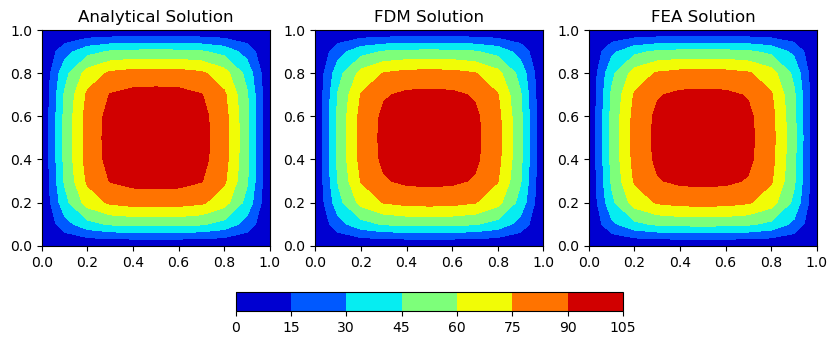

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10, 4))

# Analytical Solution
ax0 = axes[0].contourf(X, Y, T_A ,cmap='jet')
axes[0].set_title("Analytical Solution")

#FDM Solution
axes[1].contourf(X, Y, T_FDM,cmap='jet')
axes[1].set_title("FDM Solution")

#FEA Solution
axes[2].contourf(X, Y, T_FEA,cmap='jet')
axes[2].set_title("FEA Solution")

#Colorbar
cmap = fig.colorbar(ax0,ax=axes,location='bottom',shrink=.5)

In [74]:
#Displays the amount of precision for data frame
pd.set_option("display.precision", 5)

##### Temperatures Calculations

Max Temperatures:

In [75]:
Max_Temp_A  = np.max(T_A )
Max_Temp_FDM = np.max(T_FDM)
Max_Temp_FEA = np.max(T_FEA)

Average Temperatures:

In [76]:
Avg_Temp_A = np.mean(T_A)
Avg_Temp_FDM = np.mean(T_FDM)
Avg_Temp_FEA = np.mean(T_FEA)

##### Temperatures Data

In [77]:
df_Temps = pd.DataFrame({
  'Temperature': ['Max','Average'],
  'Analytical': [Max_Temp_A,Avg_Temp_A],
  'FDM': [Max_Temp_FDM,Avg_Temp_FDM],
  'FEA': [Max_Temp_FEA,Avg_Temp_FEA]
})

df_Temps

,Temperature,Analytical,FDM,FEA
0,Max,99.61554,98.88413,98.76300
1,Average,46.42217,45.76441,46.21688


##### Error Calculations

In [78]:
# Error between Analytical and FDM 
Error_FDM = abs(T_A - T_FDM)

# Error between Analytical and FEA
Error_FEA = abs(T_A - T_FEA)

Max Error:

In [79]:
MaxError_FDM = np.max(Error_FDM)
MaxError_FEA = np.max(Error_FEA)

In [80]:
#Location in which the maxximum error occurs
Loc_FDM = np.where(Error_FDM == np.max(MaxError_FDM))

Loc_FEA = np.where(Error_FEA == np.max(MaxError_FEA))

Loc_FDM, Loc_FEA #Max error occurs at x=.1, y=.1 for both FDM 

((array([7], dtype=int64), array([7], dtype=int64)),
 (array([1], dtype=int64), array([1], dtype=int64)))

In [81]:
#Max error occurs at x=.7, y=.7 FDM 

Percent_MaxError_FDM =(MaxError_FDM) / T_analytic[2,7,7] *100

#Max error occurs at x=.1, y=.1 FEA

Percent_MaxError_FEA = (MaxError_FEA) / T_analytic[2,1,1] *100

Average Error:

In [82]:
AvgError_FDM = np.mean(Error_FDM)
AvgError_FEA = np.mean(Error_FEA)

##### Error Data:

In [83]:
df_Error_Temps = pd.DataFrame({
  'Error Type' : ['Max Absolute','Max Relative[%]','Average'],
  'Analytical': [0,0,0], #No error between analytical and itself
  'FDM': [MaxError_FDM,Percent_MaxError_FDM, AvgError_FDM],
  'FEA': [MaxError_FEA,Percent_MaxError_FEA,AvgError_FEA]
})

df_Error_Temps

,Error Type,Analytical,FDM,FEA
0,Max Absolute,0,2.08710,2.37835
1,Max Relative[%],0,2.30100,9.86842
2,Average,0,0.66307,0.73335


### Discussion

The comparative analysis of the Finite Difference Method (FDM) and Finite Element Analysis (FEA) reveals intriguing insights into their performance. One of the key observations is the variation in the maximum relative error. FDM exhibited a wider range of errors, ranging from 2.3% to 12.43%, whereas FEA showcased more consistent results with errors varying from 3.05% to 9.87%. This implies that FEA may offer a more stable and predictable solution in certain scenarios.

Another noteworthy finding is the temporal aspect of their performance. FEA demonstrated superior results for shorter time intervals, particularly at t=1s and t=10s, whereas FDM excelled when simulating for longer periods, as evident at t=60s. This suggests that the choice between these methods should be influenced by the specific time frame of the analysis.

Interestingly, FDM and FEA produced similar overall results, indicating that both methods are viable options depending on the context and requirements of the simulation. However, it's essential to consider the location of errors. The highest error occurred near the edges of the square, suggesting that special attention should be paid to boundary conditions and mesh refinement in these regions to improve accuracy.

Despite variations in relative error, the analysis displayed very good average absolute error for both methods, underscoring their reliability in practical applications. Nonetheless, there is room for improvement. FDM could potentially benefit from employing higher order methods to further enhance accuracy, while FEA could explore the use of higher element orders to achieve even better results.

One factor that facilitated this comparative study was the software tool ANSYS, which enabled remarkably fast setup and runtime for simulations. While FDM may not be as rapid as FEA, it still offers a significant advantage over solving analytical solutions, particularly for complex systems with complex geometries, where analytical solutions may not even exist. This highlights the practicality and efficiency of numerical methods in solving real-world engineering problems.

Looking ahead, future projects could consider extending this analysis to more complex 3-D systems, which may provide additional insights into the relative strengths and weaknesses of FDM and FEA. Moreover, exploring higher order elements and methods in both FDM and FEA could lead to even more accurate simulations, making them even more valuable tools for engineers and researchers in various fields. 